# Lending loans

### Context


LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. The company claims that $15.98 billion in loans had been originated through its platform up to December 31, 2015.

An online peer-to-peer lending platform provides potential investors with some of the data it holds on borrowers. Borrowers are assigned an interest rate that varies according to a credit score. The higher the score (more reliable and less risky the loan), the lower the interest rate. From the investor's perspective, higher interest rate loans are more attractive because they offer a higher return on investment (ROI), but on the other hand, they pose risks of not being repaid at all (default). Therefore, a Machine Learning-based prediction model, which could predict which loans are most likely to be repaid, particularly for high-interest rates, would yield higher returns for investors while minimizing the associated risks.

### Goals

the goal is to predict which if the loan will be paid. 

if I am an ivestor, I will use this:
    1. to select the loan I want to invest (so the one that are predicted as paid)
    2. to select a loan that can retrun a maximum profit
    
**I need the model to accurately predict paid loans of high interest rates**

the dataset is imbalanced

# Table of Contents
* 1. [Data Exploration](#Dataexplo)
* 2. [Dataset Cleaning](#DataClean)
* 3. [Define target](#tgv)
* 4. [Imbalanced dataset: resampling strategy](#resamp)
* 5. [Datset check and  variable transformations](#check)
* 6. [Classification](#classif)
    * 6.1 [Metric](#metric)
    * 6.2 [Nested cross validation](#nested)
    * 6.3 [train the best model](#bestmodel)
* 7 [Results from an investor perspective](#results)



## 1. Data exploration <a class="anchor" id="Dataexplo"></a>

Read the data file

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../input/lending_file.csv",index_col=0)
df.head()




,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,next_pymnt_d,application_type,acc_now_delinq,total_bal_il,all_util,inq_fi,total_cu_tl,bc_util,total_bal_ex_mort,total_bc_limit
id,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36 months,13.99,123.03,C,leadman,10+ years,MORTGAGE,55000.0,Not Verified,...,NaN,Individual,0.0,4981.0,34.0,3.0,1.0,37.2,7746.0,2400.0
68355089,24700.0,36 months,11.99,820.28,C,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,...,NaN,Individual,0.0,18005.0,29.0,0.0,0.0,27.1,39475.0,79300.0
68341763,20000.0,60 months,10.78,432.66,B,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,...,NaN,Joint App,0.0,10827.0,65.0,2.0,5.0,55.9,18696.0,6200.0
66310712,35000.0,60 months,14.85,829.90,C,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,...,Apr-2019,Individual,0.0,12609.0,45.0,0.0,1.0,12.1,52226.0,62500.0
68476807,10400.0,60 months,22.45,289.91,F,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,...,NaN,Individual,0.0,73839.0,78.0,2.0,1.0,77.5,95768.0,20300.0


the dataset contaisn several attributes about each individual such as its income, the amout of the loan, how long it has been employed....
this dataset is a subset of the lending club  inital dataset. many columns were removed. I do not knwo if the original attributes removed were the less important features or not

the first thing to do is to check the columns and how many complete it is

In [44]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 855502 entries, 68407277 to 88215728
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            855502 non-null  float64
 1   term                 855502 non-null  object 
 2   int_rate             855502 non-null  float64
 3   installment          855502 non-null  float64
 4   grade                855502 non-null  object 
 5   emp_title            803135 non-null  object 
 6   emp_length           803471 non-null  object 
 7   home_ownership       855502 non-null  object 
 8   annual_inc           855502 non-null  float64
 9   verification_status  855502 non-null  object 
 10  loan_status          855502 non-null  object 
 11  purpose              855502 non-null  object 
 12  delinq_2yrs          855502 non-null  float64
 13  fico_range_high      855502 non-null  float64
 14  open_acc             855502 non-null  float64
 15  total_pymnt  

,loan_amnt,int_rate,installment,annual_inc,delinq_2yrs,fico_range_high,open_acc,total_pymnt,acc_now_delinq,total_bal_il,all_util,inq_fi,total_cu_tl,bc_util,total_bal_ex_mort,total_bc_limit
count,855502.000000,855502.000000,855502.000000,8.555020e+05,855502.000000,855502.000000,855502.000000,855502.000000,855502.000000,4.557180e+05,455695.000000,455718.000000,455717.000000,846440.000000,8.555020e+05,8.555020e+05
mean,14983.223739,12.823919,442.984794,7.825165e+04,0.354076,698.527795,11.911509,14938.089404,0.006443,3.561987e+04,60.225478,0.965009,1.498709,60.403783,5.239147e+04,2.215294e+04
std,8790.895225,4.644903,258.303789,7.566224e+04,0.938743,30.801650,5.698813,9849.174255,0.087276,4.257060e+04,20.159624,1.497837,2.722067,27.926861,4.955753e+04,2.203580e+04
min,1000.000000,5.320000,14.010000,0.000000e+00,0.000000,664.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,9.170000,255.300000,4.700000e+04,0.000000,674.000000,8.000000,7333.650000,0.000000,9.495000e+03,47.000000,0.000000,0.000000,39.000000,2.227300e+04,8.000000e+03
50%,13100.000000,12.290000,380.485000,6.500000e+04,0.000000,689.000000,11.000000,12566.696768,0.000000,2.378100e+04,61.000000,0.000000,0.000000,63.300000,3.942800e+04,1.550000e+04
75%,20000.000000,15.590000,585.830000,9.300000e+04,0.000000,714.000000,15.000000,20586.859332,0.000000,4.636400e+04,74.000000,1.000000,2.000000,85.000000,6.601400e+04,2.880000e+04
max,40000.000000,30.990000,1584.900000,9.573072e+06,39.000000,850.000000,97.000000,61184.573797,14.000000,1.547285e+06,204.000000,48.000000,111.000000,318.200000,2.921551e+06,1.105500e+06


some columns are weird:
* delinq_2yrs for example because the mean is 0.35, max is 39 but median is 0. most of the rows shoule be 0
* open_acc because mean and std are below 10, 75% of the data is below 15, but the max is 97. there can be outliers. we can see that as well on  annual_inc

### 2. Dataset Cleaning <a class="anchor" id="DataClean"></a>

I will remove the columns with too many NaN. all that have more than 40% of empty data are removed

In [45]:
number_of_nans = df.isna().sum()
del_col = [col for col,N in number_of_nans.items() if N>df.shape[0]*0.4]
print(del_col)
df = df.drop(del_col,axis=1)

['next_pymnt_d', 'total_bal_il', 'all_util', 'inq_fi', 'total_cu_tl']


We can see that the job title is not a very good feature because it is very specific to each individual and so we have a wide list of different profession. we could for example try to use a text based alogorithm to group profession

In [46]:
print('number of different job titles',len(df['emp_title'].unique()),'on ',df.shape[0],' samples')

number of different job titles 210391 on  855502  samples


In [47]:
df = df.drop('emp_title',axis=1)

I keep only non NaNs data

In [48]:
ii = df.isna().sum(axis=1)==0
## ii = True s'il n'y a aucune valeurs vide pour toutes les colonnes
df = df.loc[ii,:]

### 3. the target variable <a class="anchor" id="tgv"></a>

we need to learn from this dataset if a loan will be paid. the variable is loan_status and it can take several values:
* Current : not finished, no incidents
* In Grace Period :late payment < 15 days
* Late (16-30 days) : late payment < 30 days
* Late (31-120 days) : late payment < 120 days
* Fully Paid : fully paid loan
* Default : no payment since more than 120 days
* Charged Off : no hope to be paid.

In [49]:
td = df['loan_status'].value_counts(normalize=True)
print(td)

loan_status
Fully Paid            0.616208
Current               0.207898
Charged Off           0.164879
Late (31-120 days)    0.006807
In Grace Period       0.002844
Late (16-30 days)     0.001353
Default               0.000010
Name: proportion, dtype: float64


<Axes: xlabel='loan_status'>

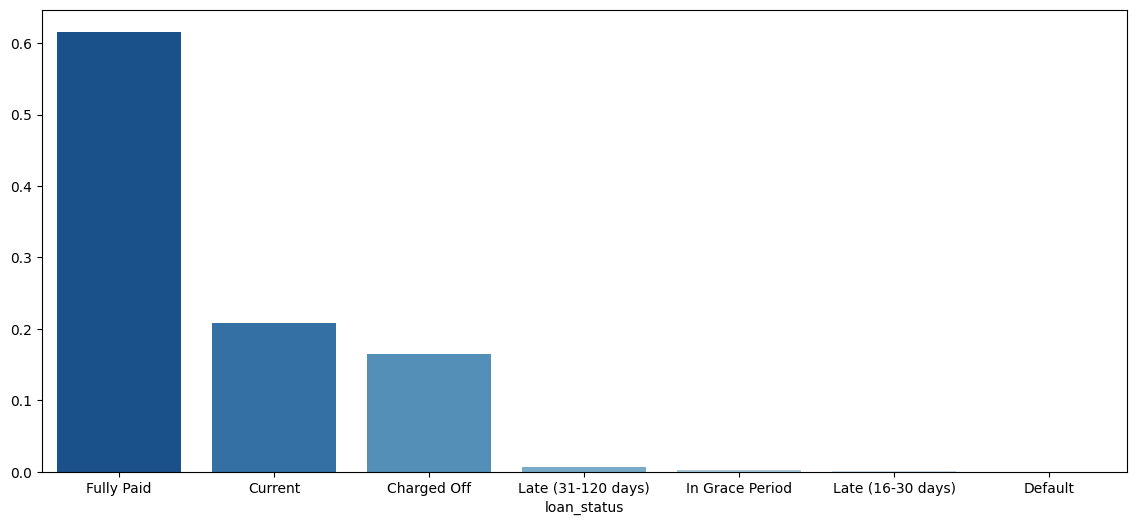

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot()
sns.barplot(y=td.values,x=td.index,palette='Blues_r',ax=ax)

In this classification dataset, I will need to transform the target variable as binary 
* 0: Default and Charged Off: Charged Off probability to be paid is very low
* 1 : Fully paid and current: no problem

the others, I removed: ther are paiment delays

In [51]:
to_del = df['loan_status'].isin(['In Grace Period','Late (16-30 days)','Late (31-120 days)'])
df = df[-to_del]

In [52]:
target = df['loan_status'].isin(['Fully Paid','Current']).astype(int)

In [53]:
df = df.drop('loan_status',axis=1)

#### Proportions of 1/0

In [54]:
print(target.value_counts(normalize=True))

loan_status
1    0.833276
0    0.166724
Name: proportion, dtype: float64


This dataset is imbalanced, with a majority of class 1. This means that a model predicting only class 1 would already have an accuracy of 80%. It's necessary to balance the dataset or focus on classifying class 0

The grade variable contains a rating ranging from A to G. The interest rate is directly calculated based on this rating. Therefore, a poorly rated loan that is correctly repaid yields more to investors than a loan rated A

### target variable versus loan grade

In [55]:
cc = pd.crosstab(target,df['grade'])
print(cc)

grade             A       B       C      D      E      F     G
loan_status                                                   
0              6771   25583   42012  28872  18598   7305  1983
1            127992  207499  189910  81097  36568  10028  2256


In [56]:
cc = pd.crosstab(target,df['grade'],normalize='columns')
print(cc)

grade               A        B         C         D         E        F  \
loan_status                                                             
0            0.050244  0.10976  0.181147  0.262547  0.337128  0.42145   
1            0.949756  0.89024  0.818853  0.737453  0.662872  0.57855   

grade               G  
loan_status            
0            0.467799  
1            0.532201  


<Axes: xlabel='grade', ylabel='int_rate'>

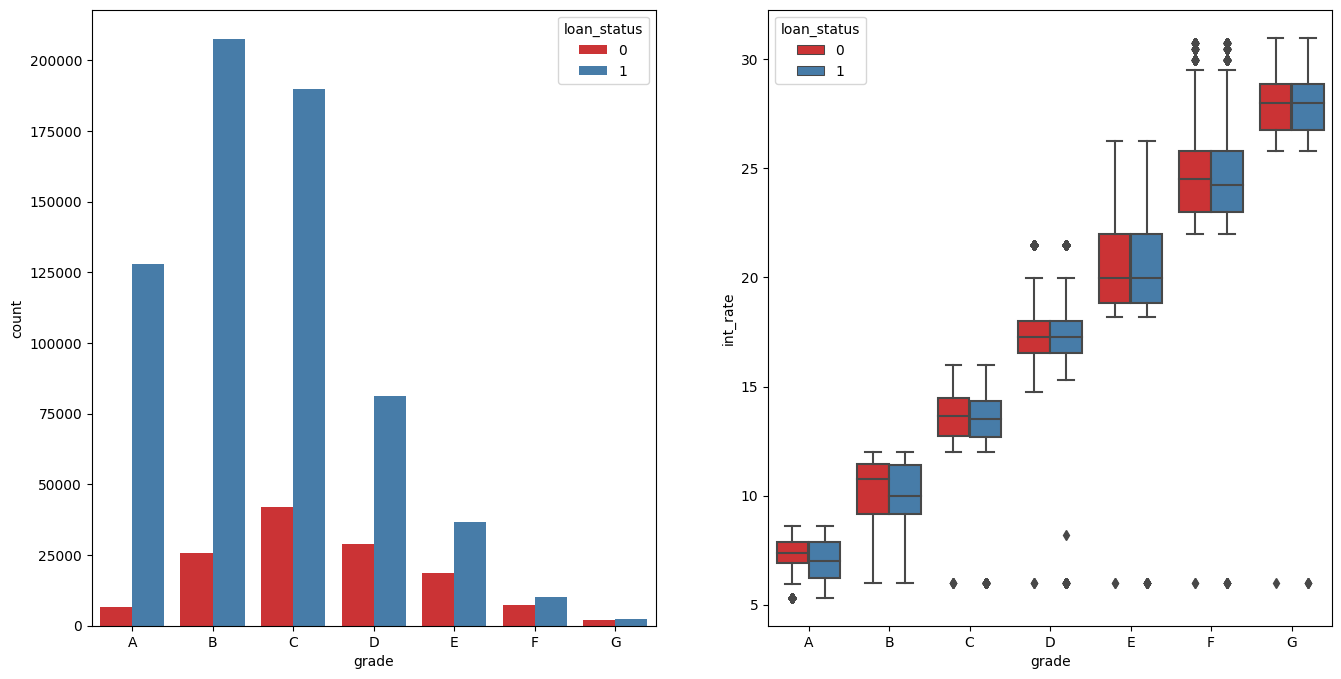

In [57]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
sns.countplot(x=df['grade'],hue=target,order=['A','B','C','D','E','F','G'],palette='Set1')
ax = fig.add_subplot(122)
sns.boxplot(x=df['grade'],y=df['int_rate'],hue=target,order=['A','B','C','D','E','F','G'],palette='Set1')


As an investor, I will check if F,G grades are well predicted

In [58]:
df['grade'] = df['grade'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})

/tmp/ipykernel_32/901195914.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['grade'] = df['grade'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})


## 4. Imbalanced dataset: resampling strategy <a class="anchor" id="resamp"></a>

I resample the database so they are equal number of 0 and 1 but also as many grade A, B,C....
I dont want the model to be influneced by too many grade A as I am interested in grade E,F,G

In [59]:
from imblearn.under_sampling import RandomUnderSampler
ru = RandomUnderSampler()


In [60]:
# resampling only the grade 6 to get the number of 0 and 1 I want per grade
grade6 = df['grade']==6
X = dict()
y = dict()
ru = RandomUnderSampler()
X[6],y[6]= ru.fit_resample(df[grade6],target[grade6])

number of class 0 for grade 6

In [61]:
N = X[6].shape[0]//2

I reample the other grades by defining the number of 0 and 1 in the target variable

In [62]:
for grade in range(6):
    cur_grade = df['grade']==grade
    ru = RandomUnderSampler(sampling_strategy={0:N,1:N})
    X[grade],y[grade]= ru.fit_resample(df[cur_grade],target[cur_grade])
    #print(y[grade].value_counts())
print(X.keys())
[len(val) for val in X.values()]

dict_keys([6, 0, 1, 2, 3, 4, 5])


[3966, 3966, 3966, 3966, 3966, 3966, 3966]

In [63]:
XX = X[6]
yy = y[6]
for grade in range(6):
    XX = pd.concat((XX,X[grade]))
    yy = pd.concat((yy,y[grade]))


I finally have a balanced dataset

<Axes: xlabel='grade', ylabel='int_rate'>

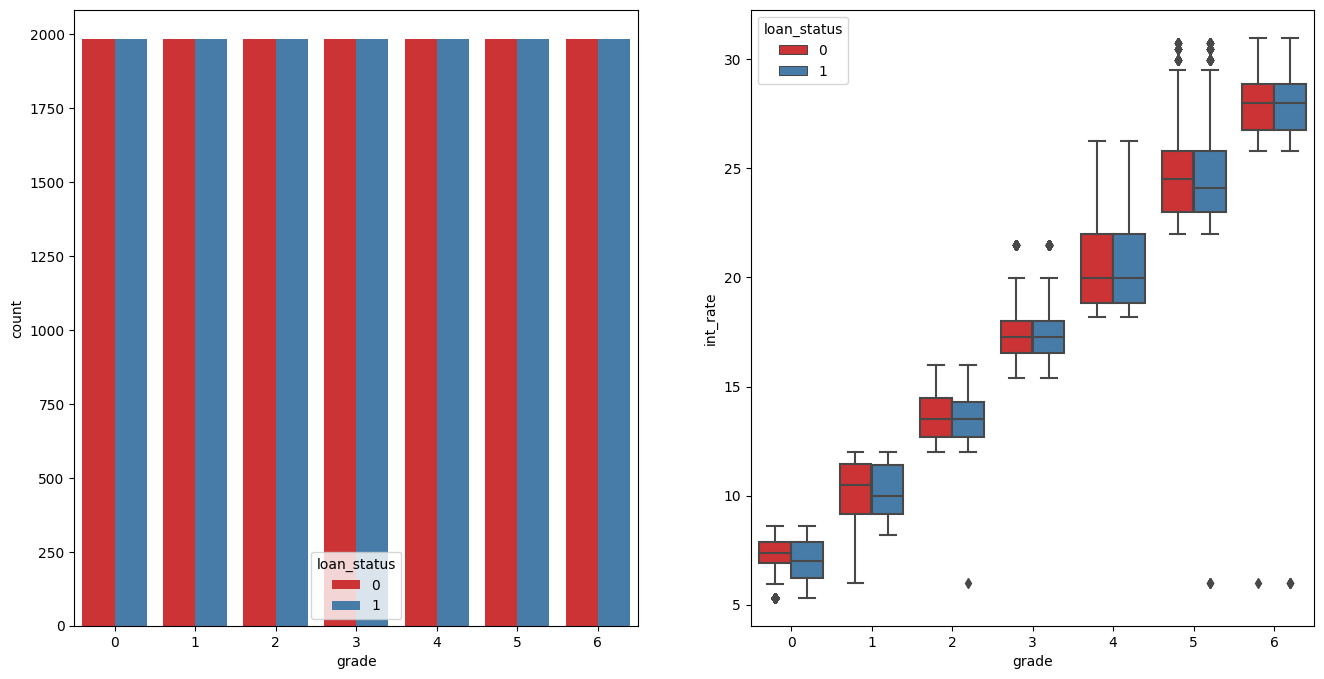

In [64]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
sns.countplot(x=XX['grade'],hue=yy,order=list(range(7)),palette='Set1')
ax = fig.add_subplot(122)
sns.boxplot(x=XX['grade'],y=XX['int_rate'],hue=yy,order=list(range(7)),palette='Set1')

here is my database corrlation matrix

<Axes: >

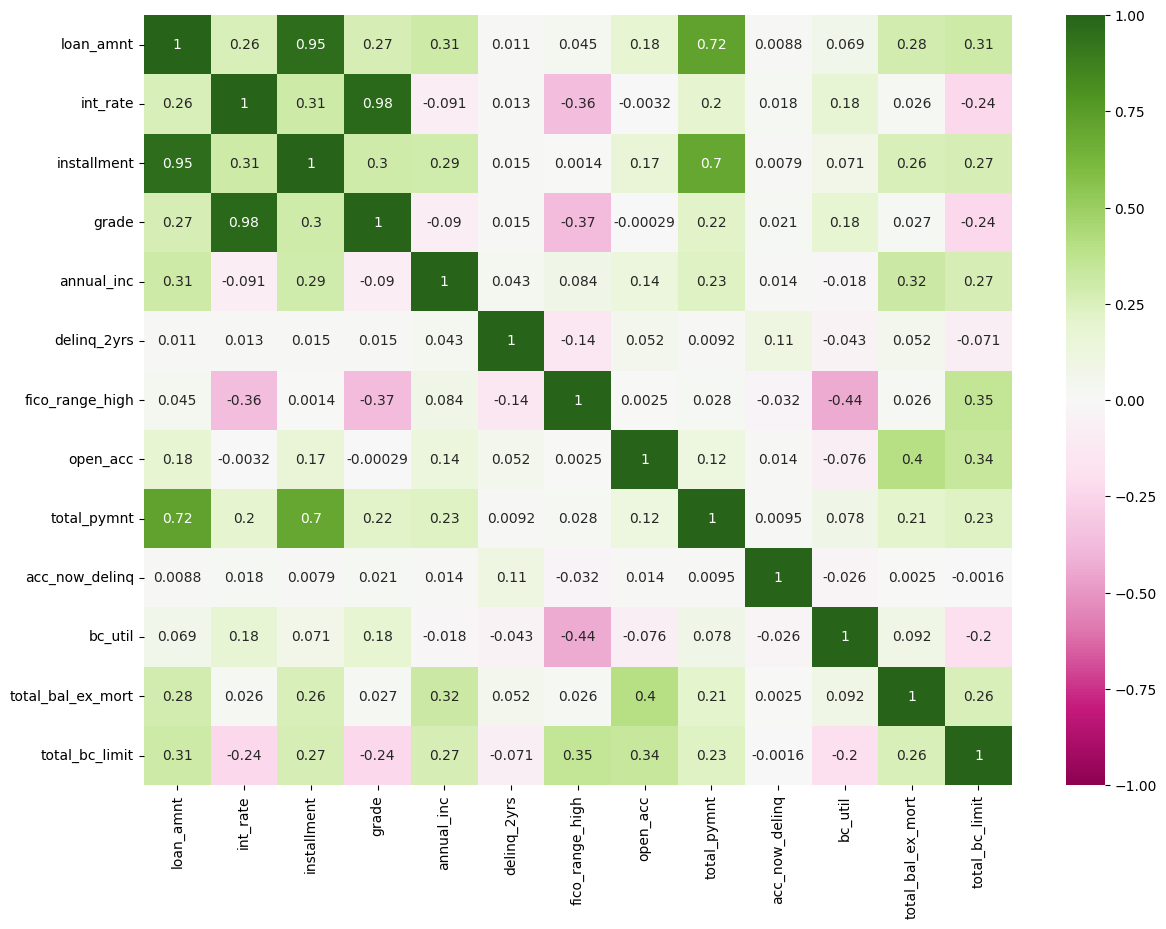

In [65]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot()
sns.heatmap(XX.select_dtypes('number').corr(),vmin=-1,vmax=1,annot=True,cmap='PiYG')

Grade and installment are super correlated. I can remove one. idem for installement and load_amount

I delete grade but keep it in another variable as I want to check performance based on the grade

In [66]:
Xgrade = XX['grade']
XX = XX.drop(['grade','installment'],axis=1)


## 5. Datset check and variable transformations <a class="anchor" id="check"></a>

emp_length
10+ years    9726
2 years      2656
3 years      2420
< 1 year     2284
1 year       2006
5 years      1848
4 years      1808
8 years      1407
6 years      1257
7 years      1180
9 years      1170
Name: count, dtype: int64


<Axes: xlabel='emp_length', ylabel='count'>

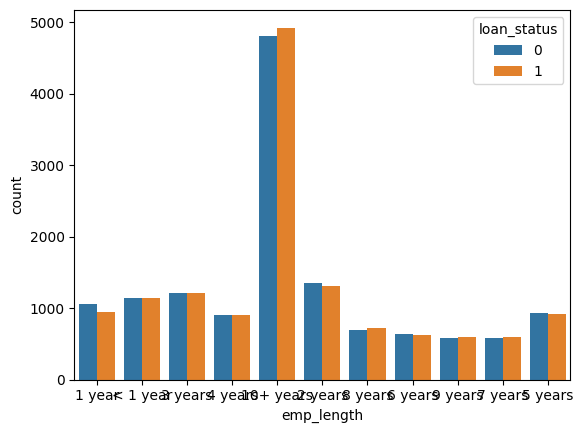

In [67]:
print(XX['emp_length'].value_counts())
sns.countplot(x=XX['emp_length'], hue=target)


In [68]:
rdict = {'%d years' %k: k for k in range(2,10)}
rdict.update({'1 year':1,'< 1 year':0,'10+ years':10})
print(rdict)
XX['emp_length'] = XX['emp_length'].replace(rdict)

{'2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '1 year': 1, '< 1 year': 0, '10+ years': 10}


/tmp/ipykernel_32/1884692292.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  XX['emp_length'] = XX['emp_length'].replace(rdict)


verification_status
Source Verified    11864
Verified           10312
Not Verified        5586
Name: count, dtype: int64


<Axes: xlabel='verification_status', ylabel='count'>

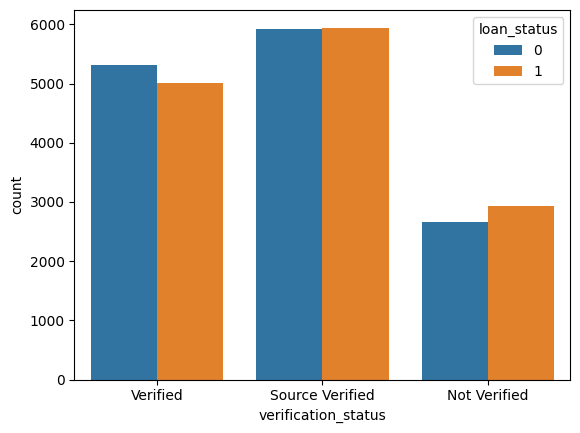

In [69]:
print(XX['verification_status'].value_counts())
sns.countplot(x=XX['verification_status'], hue=target)


### check variable distribution

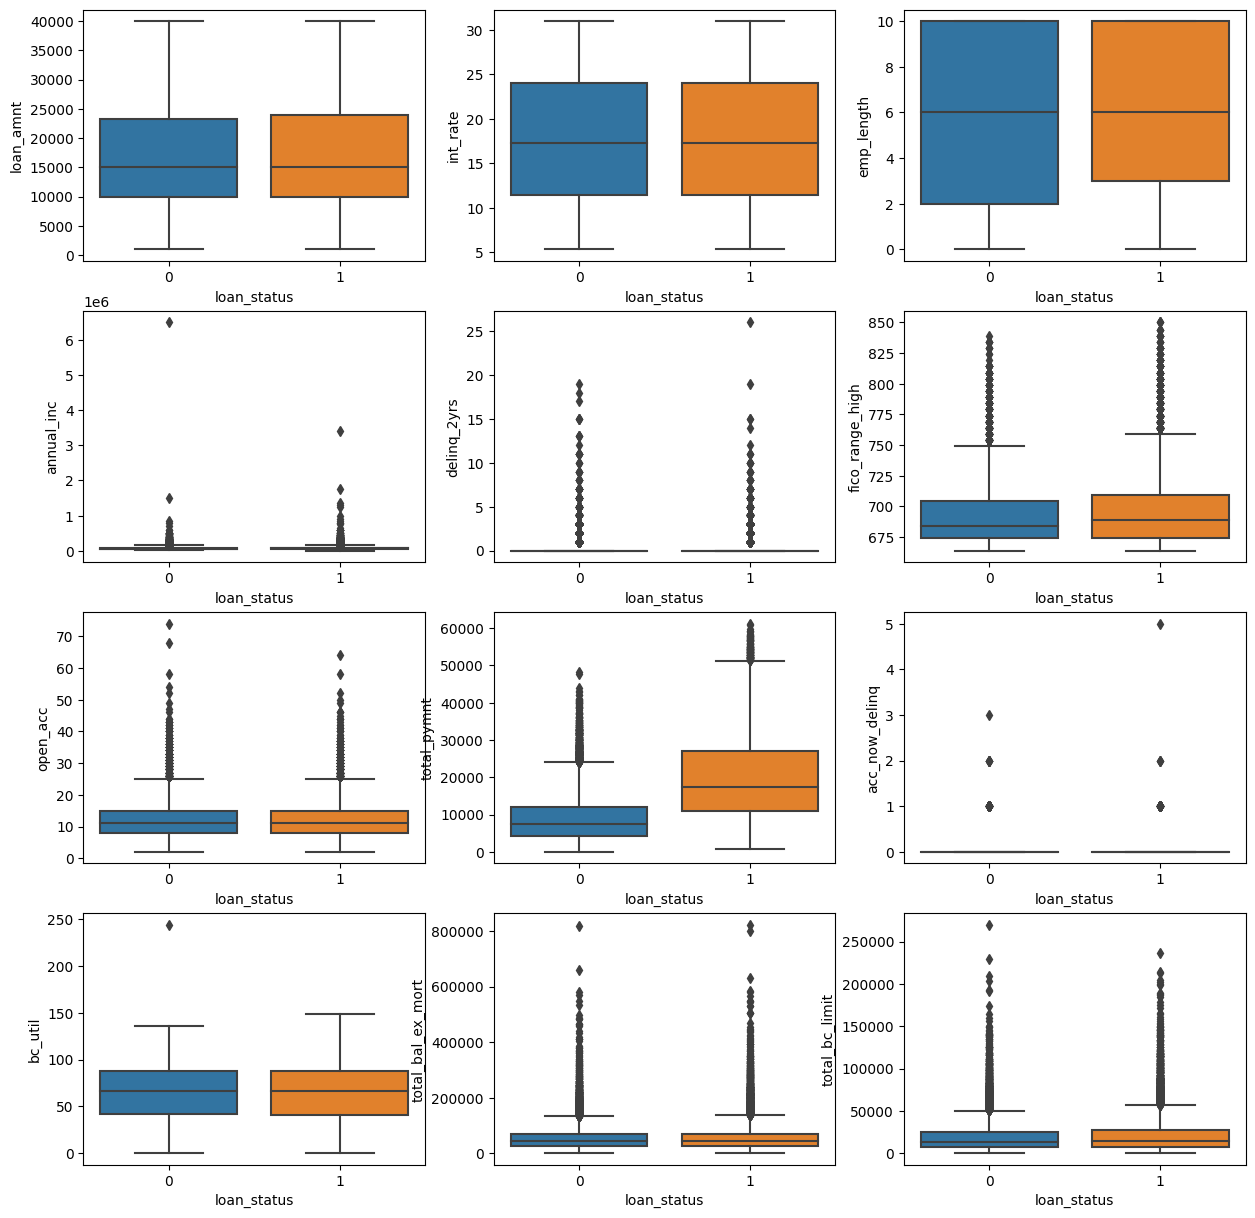

In [70]:
fig, axes = plt.subplots(4,3, figsize=(15,15))
axes = axes.flatten()

i = 0
for t in XX.select_dtypes('number').columns:
    ax = sns.boxplot(x=yy, y=XX[t], ax=axes[i])
    i +=1

Why a loan with so much income!!

In [71]:
XX.loc[XX['annual_inc']>5e6,:]

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,delinq_2yrs,fico_range_high,open_acc,total_pymnt,application_type,acc_now_delinq,bc_util,total_bal_ex_mort,total_bc_limit
id,,,,,,,,,,,,,,,,,
73470419,25000.0,60 months,8.39,10,MORTGAGE,6500000.0,Source Verified,debt_consolidation,0.0,779.0,19.0,2546.3,Individual,0.0,13.7,44424.0,34800.0


In [72]:
XX.loc[XX['acc_now_delinq']>=2,:]

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,delinq_2yrs,fico_range_high,open_acc,total_pymnt,application_type,acc_now_delinq,bc_util,total_bal_ex_mort,total_bc_limit
id,,,,,,,,,,,,,,,,,
41073690,14400.0,60 months,25.89,8,MORTGAGE,70000.0,Source Verified,home_improvement,3.0,664.0,18.0,16757.480000,Individual,3.0,30.0,67122.0,4000.0
40227546,35000.0,60 months,25.80,2,MORTGAGE,120000.0,Verified,debt_consolidation,4.0,669.0,20.0,27023.690000,Individual,2.0,33.4,80598.0,25800.0
39379580,16575.0,60 months,25.83,3,MORTGAGE,148000.0,Not Verified,debt_consolidation,3.0,664.0,8.0,9805.570000,Individual,2.0,47.1,28431.0,5000.0
85941438,24850.0,60 months,29.67,0,MORTGAGE,116000.0,Verified,debt_consolidation,2.0,689.0,16.0,14380.170000,Individual,2.0,51.0,85722.0,15800.0
68467587,15000.0,36 months,13.99,3,RENT,42000.0,Not Verified,debt_consolidation,2.0,699.0,17.0,18455.862137,Individual,2.0,52.2,84723.0,4000.0
55747824,20000.0,60 months,13.33,3,MORTGAGE,86000.0,Verified,credit_card,3.0,669.0,24.0,20156.990000,Individual,2.0,32.1,35333.0,68300.0
38467705,5000.0,36 months,15.59,6,MORTGAGE,52200.0,Not Verified,debt_consolidation,3.0,664.0,12.0,1666.370000,Individual,2.0,97.7,10286.0,3500.0
57724390,5000.0,36 months,17.86,10,MORTGAGE,71000.0,Verified,other,5.0,684.0,11.0,6519.981373,Individual,5.0,103.3,21298.0,16000.0
70025313,35000.0,60 months,26.06,3,RENT,83000.0,Not Verified,debt_consolidation,2.0,664.0,18.0,11530.610000,Individual,2.0,97.2,64559.0,5400.0


In [73]:
XX['acc_now_delinq'].value_counts()

acc_now_delinq
0.0    27615
1.0      136
2.0        9
3.0        1
5.0        1
Name: count, dtype: int64

### final dataset

In [74]:
XX = pd.get_dummies(XX)


## 6. Classification <a class="anchor" id="classif"></a>

I will test several algorithms from sklearn.

as usual, normalize and split

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train, X_test, y_train,y_test,grade_train,grade_test = train_test_split(XX,yy,Xgrade,test_size=0.2)

In [76]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## 6.1 Metric <a class="anchor" id="metric"></a>

"An investor betting on loan repayment does not want: **the class 1 to turn into 0**

they will not invest in class 0, so less attention is paid to it; they are interested in the accuracy of class 1


In [77]:
from sklearn.svm import SVC
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score,precision_score


as specified, I need to compare models base on class 1 recall

In [78]:
myscore = make_scorer(recall_score,pos_label = 1)

I run 3 classifiers and make a gridsearch for each of them used nested cross-validation

In [82]:
K = StratifiedKFold(n_splits=3, shuffle=True)


## 6.2 Model Slection using nested cross_validation <a class="anchor" id="nested"></a>

In [83]:
lr = LogisticRegression (random_state=22, max_iter=10000)
rfc = RandomForestClassifier (random_state=22)
svc = SVC(max_iter=10000,kernel='rbf',random_state=22)

param_grid_lr = {'solver': ['liblinear', 'lbfgs','newton-cholesky'], 'C': np.logspace(-4, 2, 7)}
param_grid_rf =  {'n_estimators': [50, 100,300],'min_samples_leaf': [1, 5,10],'criterion':['gini', 'entropy']}
param_grid_svc = { 'C': np.logspace(0, 2,3),'gamma': np.logspace(-4, 0, 5)}


In [84]:
gridcvs = {}
for estimator,params,name in zip([lr,rfc,svc],[param_grid_lr,param_grid_rf,param_grid_svc],['LogisticRegression','RandomForest','SupportVectorMachines']):
    gridcvs[name] = GridSearchCV(estimator,param_grid=params )


In [85]:
outer_scores = {}
for key,value in gridcvs.items():
    
    outer_scores[key] = cross_val_score(gridcvs[key], X_train, y_train, cv=K)
    print(key,': ',np.mean(outer_scores[key]),'+/-',np.std(outer_scores[key]))

LogisticRegression :  0.91949209779819 +/- 0.002438939630591338
RandomForest :  0.9012562474672429 +/- 0.0039165544109113735


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Con

SupportVectorMachines :  0.9177810797424467 +/- 0.002706855484747478


The best model selected is a logistic regression. I will try a gridseacrh on a larger parameter set

## 6.3 Best model Fit <a class="anchor" id="bestmodel"></a>

I am using variable grade_test, corresponding to the grade (A-F) that I removed from my database in order to check the results of the model for each grade

In [86]:
lr = LogisticRegression (random_state=22, max_iter=50000)
parameters = {'solver': ['liblinear', 'lbfgs','newton-cholesky'], 'C': np.logspace(-2, 2, 15)}


In [87]:
grid_lr = GridSearchCV(lr,parameters,cv=K,verbose=1,scoring=myscore)
grid_lr.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=LogisticRegression(max_iter=50000, random_state=22),
             param_grid={'C': array([1.00000000e-02, 1.93069773e-02, 3.72759372e-02, 7.19685673e-02,
       1.38949549e-01, 2.68269580e-01, 5.17947468e-01, 1.00000000e+00,
       1.93069773e+00, 3.72759372e+00, 7.19685673e+00, 1.38949549e+01,
       2.68269580e+01, 5.17947468e+01, 1.00000000e+02]),
                         'solver': ['liblinear', 'lbfgs', 'newton-cholesky']},
             scoring=make_scorer(recall_score, pos_label=1), verbose=1)

In [88]:
pd.DataFrame(grid_lr.cv_results_).loc[:,['params', 'mean_test_score' , 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'C': 0.01, 'solver': 'liblinear'}",0.938909,0.002260
1,"{'C': 0.01, 'solver': 'lbfgs'}",0.937831,0.002582
2,"{'C': 0.01, 'solver': 'newton-cholesky'}",0.937921,0.002457
3,"{'C': 0.019306977288832496, 'solver': 'libline...",0.945288,0.003197
4,"{'C': 0.019306977288832496, 'solver': 'lbfgs'}",0.944839,0.003208
5,"{'C': 0.019306977288832496, 'solver': 'newton-...",0.944839,0.003208
6,"{'C': 0.0372759372031494, 'solver': 'liblinear'}",0.947803,0.002312
7,"{'C': 0.0372759372031494, 'solver': 'lbfgs'}",0.947534,0.002352
8,"{'C': 0.0372759372031494, 'solver': 'newton-ch...",0.947534,0.002352
9,"{'C': 0.07196856730011521, 'solver': 'liblinear'}",0.948522,0.003024


In [89]:
# the best parameters of the logistic regression are:
grid_lr.best_params_

{'C': 0.07196856730011521, 'solver': 'liblinear'}

In [ ]:
Results of the logistic regression on the Test data set

In [91]:
y_pred = grid_lr.predict(X_test)
display(pd.crosstab(y_test,y_pred,colnames=['prediction']))


prediction,0,1
loan_status,,
0,2499,304
1,149,2601


In [93]:
print(recall_score(y_test,y_pred,pos_label = 1)*100)


94.58181818181818


## 7. Results : Confusion matrix vs Grades <a class="anchor" id="results"></a>

In [94]:
kg = np.argmax(sc.feature_names_in_ =='grade')

In [99]:
for grad in np.arange(0,7):
    kk = grade_test==grad
    y_pred = grid_lr.predict(X_test[kk,:])
    print('GRADE ',grad)
    display(pd.crosstab(y_test[kk],y_pred,colnames=['prediction']))
    print('accuray' , accuracy_score(y_test[kk], y_pred))
    print('precision classe 1' , recall_score(y_test[kk], y_pred,pos_label=1))

GRADE  0


prediction,0,1
loan_status,,
0,334,62
1,14,374


accuray 0.9030612244897959
precision classe 1 0.9639175257731959
GRADE  1


prediction,0,1
loan_status,,
0,357,54
1,27,378


accuray 0.9007352941176471
precision classe 1 0.9333333333333333
GRADE  2


prediction,0,1
loan_status,,
0,332,44
1,27,316


accuray 0.9012517385257302
precision classe 1 0.9212827988338192
GRADE  3


prediction,0,1
loan_status,,
0,358,44
1,38,370


accuray 0.8987654320987655
precision classe 1 0.9068627450980392
GRADE  4


prediction,0,1
loan_status,,
0,365,37
1,22,393


accuray 0.9277845777233782
precision classe 1 0.946987951807229
GRADE  5


prediction,0,1
loan_status,,
0,379,35
1,14,390


accuray 0.9400977995110025
precision classe 1 0.9653465346534653
GRADE  6


prediction,0,1
loan_status,,
0,374,28
1,7,380


accuray 0.9556400506970849
precision classe 1 0.9819121447028424


Well , on grade F, the model predicted 98% of the True class 1 as Well Paid

to continue:
 * spend more time on data, there are categorial values coded as integers, we may wanto to pd_dummies. 
 * I actually did not focus too much on outliers.
 * waht are the important features to understand the model